In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('classic')
sns.set_theme(style="whitegrid")
# palette="pastel"

# Configuracion del slabmotion

> Movimiento de los atomos de las primeras 3 capas 

Para cada configuracion del slabmotion se compara con la conf de eq. inicial

Las tablas contienen Desplazamiento en Angstroms - histograma normalizado - cuentas.

Posición - desplazamiento relativo.

 - 1  Ridge 
 - 2  Facet
 - 3  Valley

Aclaraciones:
- $N_{at} = 21$ 
- $E_{cin} = N_{at} * \frac{3}{2} k_{b} T$ 

In [10]:
Kb = 8.617333262*10**(-5) # constante de Boltzman
path='Sample_50K/'
#################################################### Simulacion
# Indice de referencia
num = 00
# Temperatura de la superficie
Temp = 50
# cantidad de capas moviles de la superficie
capas = 4    
# La cantidad de atomos que se mueven son 6 por cada capa superior, menos la primera que tiene 3 atomos.
at = (capas-1)*6+3 
# Esto nos proporciona la energia cinetica de la superficie.
Ecin = at*1.5*Kb*Temp 
#################################################### 
Title = str(num)+'T-' + str(Temp)+'K'

# Lectura de Datos

In [11]:
# Lectura de los desplazamientos cuadraticos medios <R>^2 y <z>^2
Disp      = pd.read_csv(path+"rdisp.FF"                  ,delim_whitespace=True, header=None)
zDisp     = pd.read_csv(path+"zdisp.FF"                  ,delim_whitespace=True, header=None)

# Lectura del histograma de energia y temperatura
Ekin      = pd.read_csv(path+"Ekin_histogram.out"       ,delim_whitespace=True, header=None)
Epot      = pd.read_csv(path+"Epot_histogram.out"       ,delim_whitespace=True, header=None)
Temp_hist = pd.read_csv(path+"temperature_histogram.out",delim_whitespace=True, header=None)

# Lectura del histograma de movimiento de las capaz
R = dict()
vec  = ['x','y','z']
list = ['1','2','3']
for u in vec:
    for layer in list:
        df = pd.read_csv(path + u + "_layer00" + layer + "_histo_mov.out", delim_whitespace=True, header=None)
        dic = {0 : "Posicion", 1 : "Desp", 2 : "cuentas"}
        df.rename(columns=dic,inplace=True)
        tup = (u,layer)
        R[tup] = df

# Desplazamiento cuadratico medio

In [12]:
# Funcion para graficar el desplazamiento cuadratico medio en funcion del tiempo 
##  nstmax=nstmin+nsnap*nwri+20 --> nstmax = (50000){input}+100000{default}*100{steps to snap}+20
##  ttot=nstmax*h0 --> 50250.1 fs
def Plot_Disp(DISP, h_0=0.005,nwri=100,nstmin=50020, title =  Title, pth = path):
    t_0=nstmin*h_0
    DISP['ps'] = t_0 + DISP[0]*nwri*h_0
    fig, ax = plt.subplots(figsize=(12,6))
    fig.suptitle(str(num)+" - "+str(Temp)+"K - valor cuadratico medio del desplazamiento ", fontsize=12)
    ax.set_xlabel(f"Tiempo $[fs]$")
    ax.set_ylabel(f"$<r>^2[\AA^2]$ ")
    ax.set_xlim(0,50500)
    ax.legend()
    ax.grid(True)
    ax.plot(DISP['ps'],DISP[1])
    fig.tight_layout()
    fig.savefig(pth + title  + "rDisp" +".png")
    plt.show()
    plt.clf()
    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


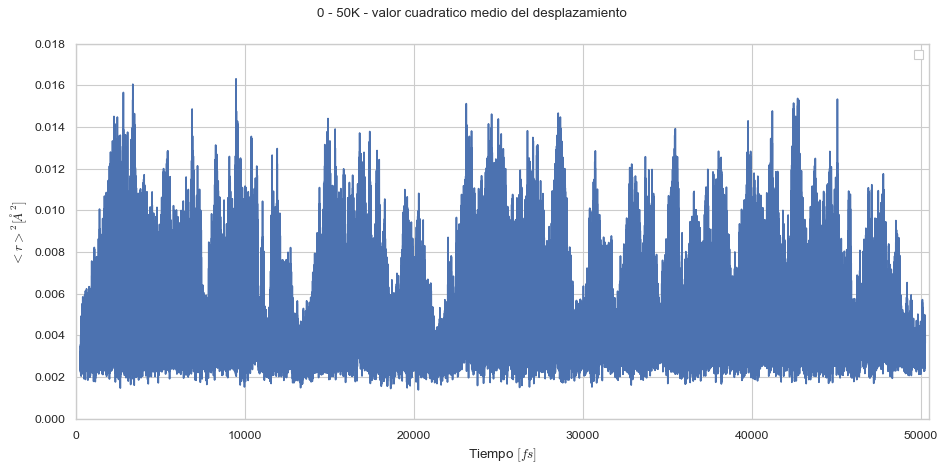

<Figure size 640x480 with 0 Axes>

In [13]:
Plot_Disp(Disp)

## Desplazamiento de las capas

In [60]:
# Funcion para comparar los movimientos de las capas en una direccion.
def PlotR(r,variable, title =  Title, pth = path):
    fig, ax = plt.subplots()
    fig.suptitle(str(num)+" - Desplazamiento de las capas a "+str(Temp)+"K", fontsize=12 )
    ax.plot(r[(variable,'1')]["Posicion"], r[(variable,'1')]["Desp"], color = "#E76F51", label= "Ridge")
    ax.plot(r[(variable,'2')]["Posicion"], r[(variable,'2')]["Desp"], color = "#E9C46A", label= "Facet")
    ax.plot(r[(variable,'3')]["Posicion"], r[(variable,'3')]["Desp"], color = "#264653", label= "Valley")
    ax.set_xlabel("Posicion " + str(variable)+f" [\AA]")
    ax.set_ylabel("cuentas normalizadas "+ str(variable))
    ax.legend()
    fig.savefig(pth + title +  str(variable) + ".png")
    fig.tight_layout()
    plt.show()
    plt.clf()
    return 

# Funcion para comparar los movimientos de las capas en todas las direcciones superponiendo por direccion.
def Plot_multiR(r, title =  Title, pth = path):
    fig, ax = plt.subplots(1,3, figsize=(16,6), sharey=True,sharex=True)
    fig.suptitle(str(num)+" - Desplazamiento de las capas a "+str(Temp)+"K", fontsize=14 )
    for i,variable in enumerate(vec):
        ax[i].plot(r[(variable,'1')]["Posicion"], r[(variable,'1')]["cuentas"]/3000, color = "#E76F51", label= "Ridge")
        ax[i].plot(r[(variable,'2')]["Posicion"], r[(variable,'2')]["cuentas"]/3000, color = "#E9C46A", label= "Facet")
        ax[i].plot(r[(variable,'3')]["Posicion"], r[(variable,'3')]["cuentas"]/3000, color = "#264653", label= "Valley")
        ax[i].set_xlabel("Posicion " + str(variable)+f" [$\AA$]")
        ax[i].set_ylabel("cuentas normalizadas "+ str(variable))
        ax[i].legend()
    fig.tight_layout()
    fig.savefig(pth +   title  + "mult" +".png")
    plt.show()
    plt.clf()
    return

In [61]:
R[('y','1')].Posicion.sum()

-0.938768777183987

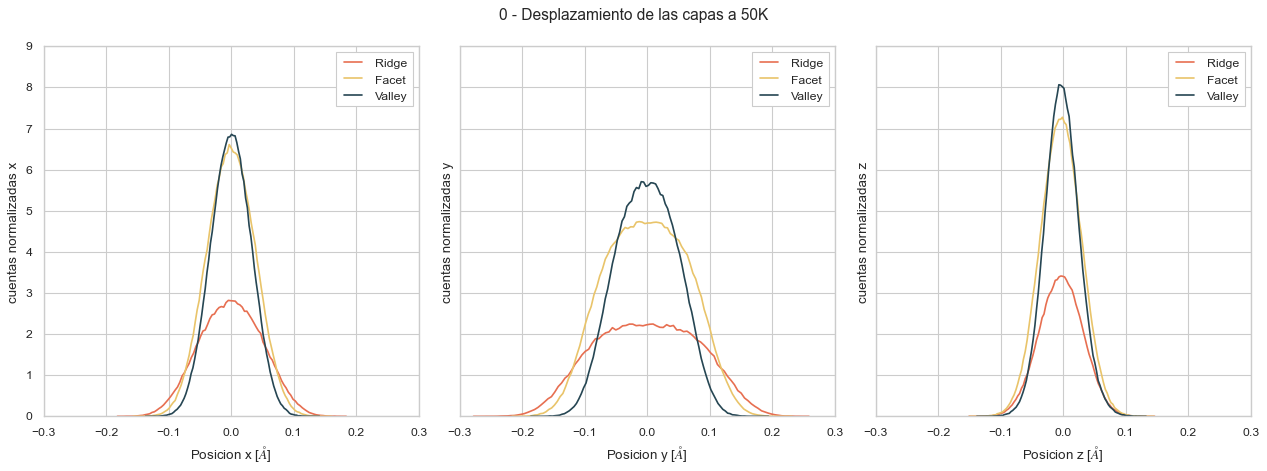

<Figure size 640x480 with 0 Axes>

In [62]:
Plot_multiR(R)

## Histogramas de energia

# Grafica de Energias

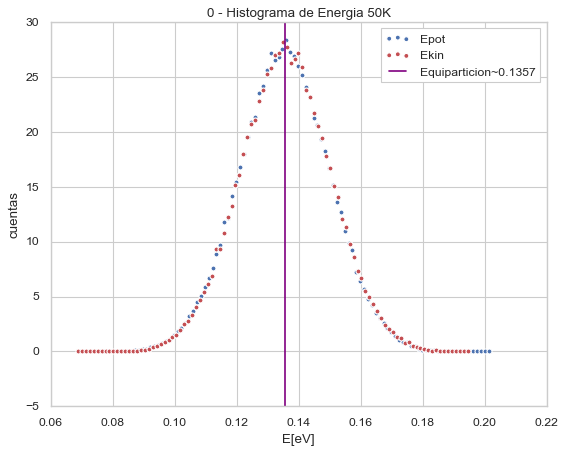

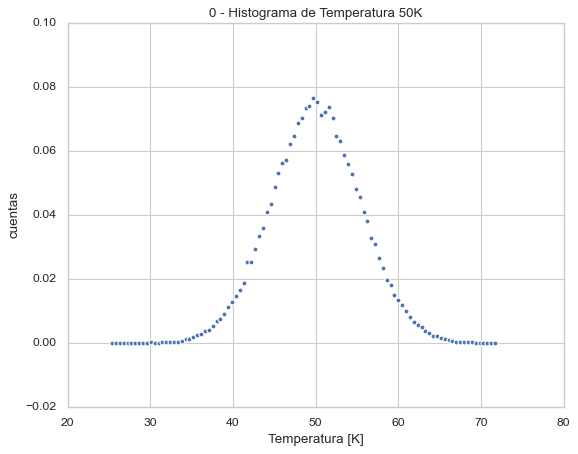

<Figure size 640x480 with 0 Axes>

In [25]:
#plt.title(str(num)+' - Histograma de Energia Cinetica '+ str(Temp)+"K")
#plt.xlabel('Energia [eV]')
#plt.ylabel('cuentas')
#plt.scatter(Ekin[0],Ekin[1])
#plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
#plt.legend()
#plt.savefig(path+Title + "Ekin_histogram.png")
##plt.show()
#plt.clf()
#
#plt.title(str(num)+' - Histograma de Energia Potencial '+ str(Temp)+"K")
#plt.xlabel('E[eV]')
#plt.ylabel('cuentas')
#plt.scatter(Epot[0],Epot[1])
#plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
#plt.legend()
#plt.savefig(path+Title + "Epot_histogram.png")
##plt.show()
#plt.clf()

plt.title(str(num)+' - Histograma de Energia '+ str(Temp)+"K")
plt.xlabel('E[eV]')
plt.ylabel('cuentas')
plt.scatter(Epot[0],Epot[1],c='b', label = 'Epot')
plt.scatter(Ekin[0],Ekin[1],c='r', label = 'Ekin')
plt.axvline(Ecin ,color="purple",label = 'Equiparticion')
plt.legend()
plt.savefig(path+Title + "E_histogram.png")
plt.show()
plt.clf()

plt.title(str(num)+' - Histograma de Temperatura '+ str(Temp)+"K")
plt.xlabel('Temperatura [K]')
plt.ylabel('cuentas')
plt.scatter(Temp_hist[0],Temp_hist[1])
plt.savefig(path+Title + "temperature_histogram.png")
plt.show()
plt.clf()